# An Introduction to Embeddings

In this notebook, we'll go over word and sentence embeddings. We'll use the pre-trained GloVe embeddings model to get the embeddings for different phrases, and compare the embeddings for different sentences and visualize them. 

In [3]:
import gensim.downloader as api
from scipy import spatial
import numpy as np

In [4]:
model = api.load('glove-wiki-gigaword-50')

In [5]:
model['tree']

array([ 0.62231 ,  1.1986  , -0.014116,  0.20125 ,  0.69419 ,  0.12068 ,
       -0.90399 , -1.4023  ,  0.43357 , -0.48537 , -0.4645  ,  0.15756 ,
        0.54261 , -0.32467 , -0.025646,  0.45742 ,  0.16561 ,  0.18819 ,
        0.062099, -0.86418 , -1.0425  , -0.81157 ,  0.3126  , -0.20279 ,
        0.55734 , -0.28634 , -0.14874 ,  1.0098  ,  0.25041 , -0.53195 ,
        2.3793  , -0.76966 , -0.63219 ,  0.3203  ,  0.15072 ,  0.23326 ,
       -0.26254 , -0.29461 ,  0.7671  , -0.11577 , -0.68129 , -0.65413 ,
       -0.58914 ,  0.24684 ,  1.5904  ,  0.33025 ,  0.41513 , -1.7468  ,
        0.82453 , -1.0886  ], dtype=float32)

Now, we need to write a function to get the embedding vector for a sentence. We can use the model to get the embedding vector for each word, or token, in the sentence. For now, let's obtain the sentence embedding by naively taking the average of each word embedding in the sentence. This is a very naive approach (think about why) but will suffice for the purposes of this notebook. In practice, you would use an encoder neural network to derive sentence embeddings.  

In [6]:
import string
# Function that gets the embedding vector for a sentence/phrase by taking the average of the word embedding vectors
def get_embedding(sentence, model=model):
    # Set all words to lowercase (the model only has lowercase words!), and tokenize it into words
    # Also, remove punctuation
    words = [word for word in sentence.lower().split() if word not in string.punctuation] 
    # Get the word embeddings for each word
    embeddings = [model[word] for word in words]
    # Return the average of the word embeddings
    return np.mean(embeddings, axis=0)

Embeddings are just vectors in an embedding space, where the distance between the vectors reflect semantic similarity. If we write a function to calculate the distance between two vectors, we can evaluate the similarity between two sentences using their embeddings.

Common ways to find the distance between two vectors include Euclidean Distance, Cosine Similarity, and the Dot Product. Pick any one of these three and implement them.

In [7]:
# We will use cosine similarity. It is probably the most common metric for comparing two vectors.
# The cosine similarity of two vectors is the cosine of the angle between them.
# Cosine similarity = 1 - cosine distance
def calculate_distance(sentence1, sentence2, model=model):
    embedding1 = get_embedding(sentence1, model)
    embedding2 = get_embedding(sentence2, model)
    return 1 - spatial.distance.cosine(embedding1, embedding2)

In [8]:
# Example words
sentence1 = "I took my dog to the park"
sentence2 = "cats in nature"

# Calculate distance between embeddings
distance = calculate_distance(sentence1, sentence2, model)
print(f"The distance between '{sentence1}' and '{sentence2}' is: {distance}")

The distance between 'I took my dog to the park' and 'cats in nature' is: 0.8193952899809682


## Visualizing Embeddings

In [9]:
sentence1 = "I took my dog to the park"
sentence2 = "Cats in nature"

embedding1 = get_embedding(sentence1, model)
embedding2 = get_embedding(sentence2, model)

In [10]:
print(f"Dimension of embedding: {embedding1.shape}")

Dimension of embedding: (50,)


The embeddings are very high dimension vectors. To be able to visualize them, we want to reduce their dimensionality. One common way to do this is [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis), or PCA.

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
def visualize_embeddings_with_similarity(sentences, model):
    embeddings = np.array([get_embedding(sentence, model) for sentence in sentences])

    # Apply PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
    for i, sentence in enumerate(sentences):
        plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], sentence)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Sentence Embeddings Visualization with PCA')
    plt.show()


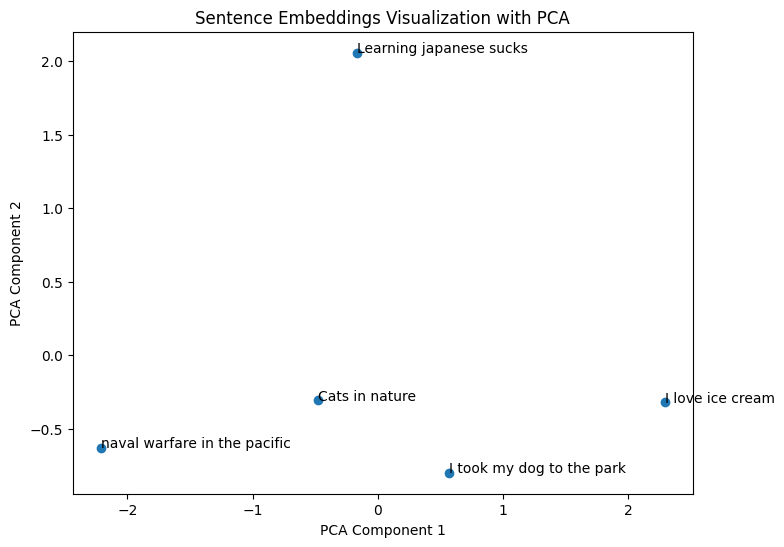

In [13]:
# Example usage
sentences = ["I took my dog to the park", 
             "Cats in nature", 
             "I love ice cream", 
             "Learning japanese sucks",
             "naval warfare in the pacific"
            ]
visualize_embeddings_with_similarity(sentences, model)

The visual we've generated makes sense, but the lack of dimensions leaves much to be desired. Let's try this again, but with 3 dimensions. That should lead to more convincing visualizations of the vectors.

In [14]:
def visualize_embeddings_with_similarity_3d(sentences, model):
    embeddings = np.array([get_embedding(sentence, model) for sentence in sentences])

    # Apply PCA with 3 components
    pca = PCA(n_components=3)
    reduced_embeddings = pca.fit_transform(embeddings)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2])
    for i, sentence in enumerate(sentences):
        ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], sentence)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.title('Sentence Embeddings Visualization with PCA (3D)')
    plt.show()

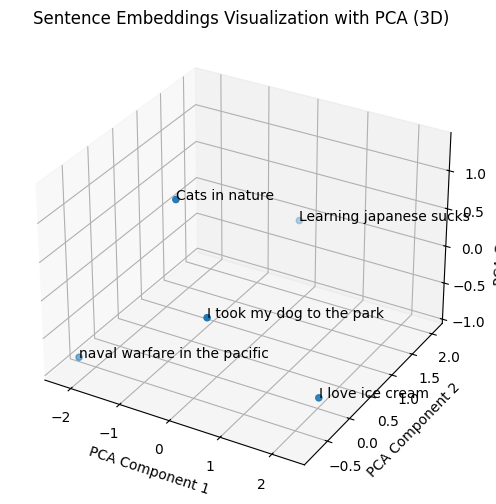

In [15]:
visualize_embeddings_with_similarity_3d(sentences, model)

The visualization of the embedding vectors in 3 dimensions more accurately distinguishes the meaning of the sentences from one another. The more dimensions we have, the more accurately and precisely we can discriminate between the meaning of different sentences.

If you'd like to challenge yourself, implement the dimensionality reduction again, this time using [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), another common dimensionality reduction method.

In [16]:
from sklearn.manifold import TSNE

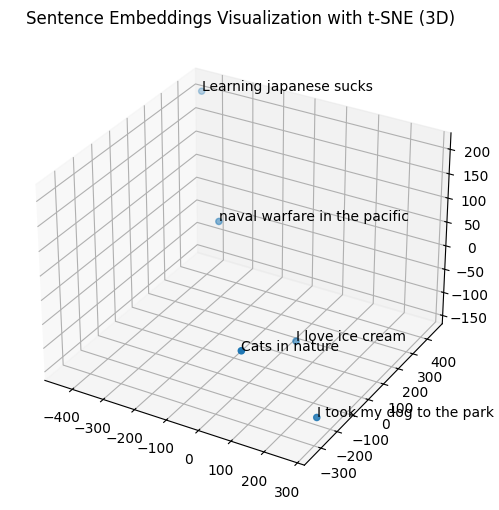

In [17]:
# OPTIONAL CHALLENGE: Try to implement the same visualization but with t-SNE

def visualize_embeddings_with_similarity_3d(sentences, model):
    embeddings = np.array([get_embedding(sentence, model) for sentence in sentences])

    # Apply t-SNE
    tsne = TSNE(n_components=3, perplexity=len(embeddings)/4, metric='cosine')
    reduced_embeddings = tsne.fit_transform(embeddings)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2])
    for i, sentence in enumerate(sentences):
        ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], sentence)
    
    plt.title('Sentence Embeddings Visualization with t-SNE (3D)')
    plt.show()

visualize_embeddings_with_similarity_3d(sentences, model)